In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(requests.get("http://resbaz.auckland-cer.cloud.edu.au/").json())
df

,timestamp,participant_name,question,answer,is_correct
0,2024-06-26 00:02:17.639261,nick,1,2,True
1,2024-06-26 00:02:20.701660,nick,1,42,False
2,2024-06-26 00:04:38.617547,nick,1,42,False
3,2024-06-26 00:04:55.129664,nick,1,42,False
4,2024-07-03 04:40:35.483340,Victor Gambarini,1,56,False
5,2024-07-03 04:40:47.923353,Victor Gambarini,1,"""👎""",False
6,2024-07-03 04:40:59.159545,Victor Gambarini,1,2,True
7,2024-07-03 04:41:05.206834,Victor Gambarini,1,👍,False
8,2024-07-03 04:41:15.410643,Victor Gambarini,1,2,True
9,2024-07-03 04:41:26.491977,Victor Gambarini,1,2,True


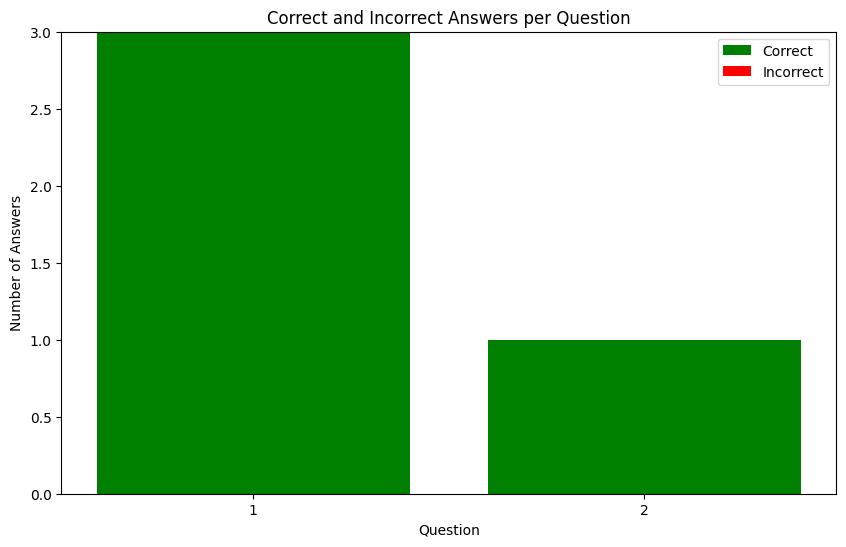

In [5]:
df['question'] = df['question'].astype(str)
df = df.sort_values(["is_correct", "timestamp"], ascending=False).drop_duplicates(["participant_name", "question"])
# Group by question and count the total and correct answers
grouped = df.groupby('question').agg(total=('is_correct', 'size'), correct=('is_correct', 'sum')).reset_index()

# Calculate incorrect answers
grouped['incorrect'] = grouped['total'] - grouped['correct']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped['question'], grouped['correct'], color='green', label='Correct')
plt.bar(grouped['question'], grouped['incorrect'], bottom=grouped['correct'], color='red', label='Incorrect')

plt.xlabel('Question')
plt.ylabel('Number of Answers')
plt.title('Correct and Incorrect Answers per Question')
plt.legend()
plt.show()

In [3]:
df_correct = df[df.is_correct].drop_duplicates(["participant_name", "question"])
df_correct

,timestamp,participant_name,question,answer,is_correct
18,2024-07-04 02:17:23.075356,Victor Gambarini,1,2,True
13,2024-07-03 22:54:50.417203,Ben,2,1.4142135623730951,True
12,2024-07-03 22:33:33.309993,Ben,1,2,True
0,2024-06-26 00:02:17.639261,nick,1,2,True


<Axes: title={'center': 'correct answers per participant'}, xlabel='participant_name'>

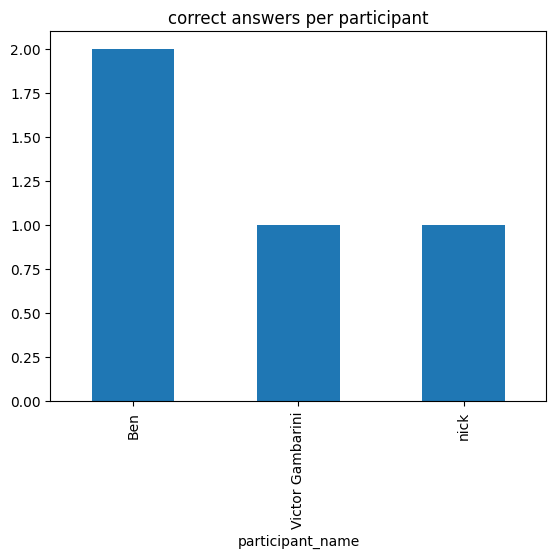

In [4]:
df_correct.participant_name.value_counts().plot.bar(title="correct answers per participant")